In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("List_of_Jobs_to_Apply.csv")
df

,Job Title,Company,Location,Salary($),Job-Type,Job-Description,Raw_Link
0,AI Content Writer,DataAnnotation,Remote,$20 - $25 an hour,Contract,You will have conversations with chatbots in o...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,AI Focused Biochemistry Postdoctoral Fellow,Lawrence Berkeley National Laboratory,"San Francisco Bay Area, CA","$77,172 - $103,704 a year",Not Provided,Berkeley Lab’s Applied Mathematics and Computa...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,MRI Technologist,Lenox Hill Radiology,"Freeport, NY 11520",$40 - $60 an hour,Part-time,Perform high quality MRI exams on incoming pat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,AI Content Writer (Tier 1),Outlier Ai,California,Not Provided,Not Provided,Flexible work schedule: Work whenever and wher...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,Google Cloud Platform Data Engineer,Publicis Sapient,"Houston, TX","$115,000 - $150,000 a year",Full-time,This position requires in-depth knowledge and ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
...,...,...,...,...,...,...,...
14997,Competitive Intelligence Lead,"Grammarly, Inc.",Hybrid work in United States,Not Provided,Not Provided,Has experience working at a senior level in co...,https://www.indeed.com/rc/clk?jk=416f3bf573d88...
14998,"Senior Writer and Editor, AI at Work",Microsoft,United States,"$103,800 - $219,200 a year",Full-time,The writer and editor will also contribute reg...,https://www.indeed.com/rc/clk?jk=a753f4b4e9424...
14999,AI Data Annotator,Vistatec,United States,Not Provided,Not Provided,Data Annotators carry out their work in an eng...,https://www.indeed.com/rc/clk?jk=644269f566114...
15000,Sustainability Go-to-Market Activation Lead,Microsoft,United States,"$129,200 - $268,900 a year",Full-time,Sitting in the Cross Solutions Sales Activatio...,https://www.indeed.com/rc/clk?jk=da0e0b51bf349...


In [3]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [4]:
# Summary statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

          Job Title    Company       Location     Salary($)   Job-Type  \
count         15002      15002          15002         15002      15002   
unique          885        667            524           401         19   
top     AI Engineer  Microsoft  United States  Not Provided  Full-time   
freq           1005       1614           3595          9067       7066   

                                          Job-Description  \
count                                               14938   
unique                                               1447   
top     View all Cornerstone Defense jobs in Bethesda,...   
freq                                                  927   

                                                 Raw_Link  
count                                               15002  
unique                                              15002  
top     https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...  
freq                                                    1  
Job Title           0
C

In [5]:
company_counts = df['Company'].value_counts()
print(company_counts.to_string())

Company
Microsoft                                                1614
Deloitte                                                 1127
Vistatec                                                  939
Cornerstone Defense                                       939
ADP                                                       939
Grammarly, Inc.                                           868
The RealReal                                              232
Oracle                                                    191
Google                                                    189
Boston Consulting Group                                   182
Zel Technologies                                          179
Apple                                                     162
Recruiting From Scratch                                   157
JSI                                                       146
Samsung Research America                                  129
Booz Allen                                                125


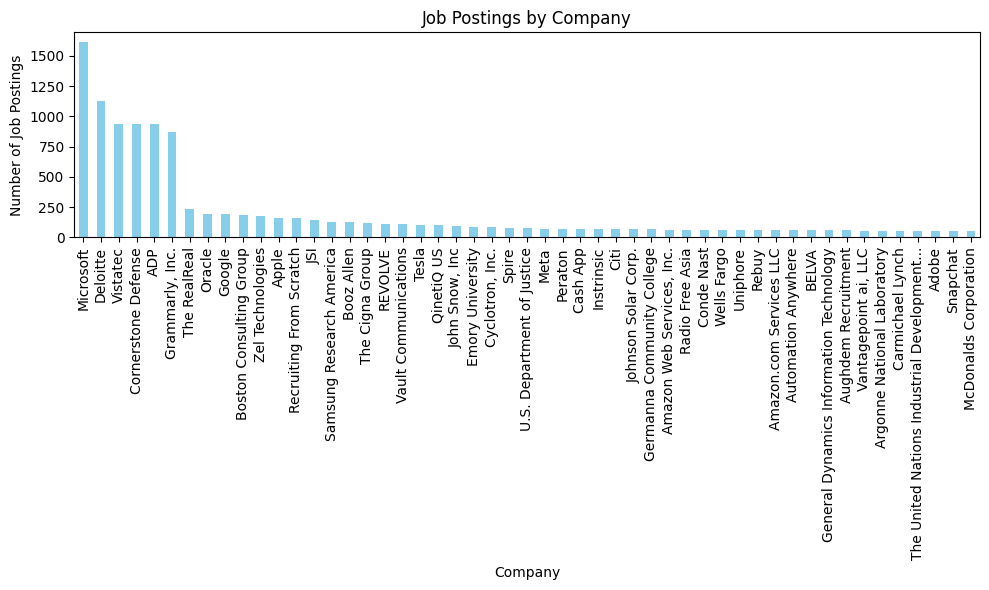

In [6]:
# Filter out companies with fewer than 5 postings
filtered_counts = company_counts[company_counts >= 50]

# Plot the data
plt.figure(figsize=(10, 6))
filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Job Postings by Company')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.tight_layout()

# Show the plot
plt.show()

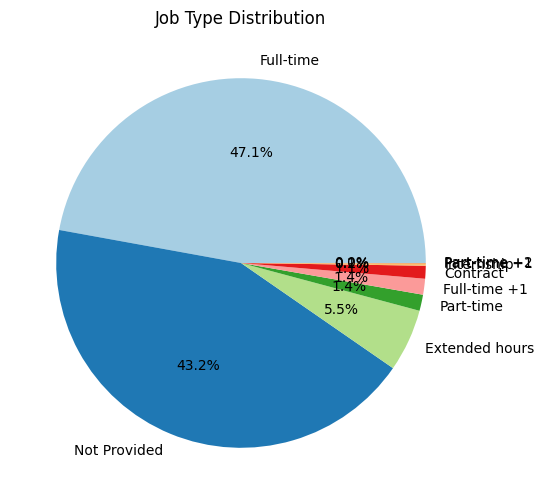

In [7]:
job_type_counts = df['Job-Type'].value_counts()

# Define a threshold for small job types
threshold = 3

# Filter out job types with fewer than the threshold
filtered_job_type_counts = job_type_counts[job_type_counts >= threshold]

# Include 'Other' for small job types
other_counts = job_type_counts[job_type_counts < threshold]

# Plot the data
plt.figure(figsize=(8, 6))
filtered_job_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(filtered_job_type_counts))))
plt.title('Job Type Distribution')
plt.ylabel('')
plt.show()

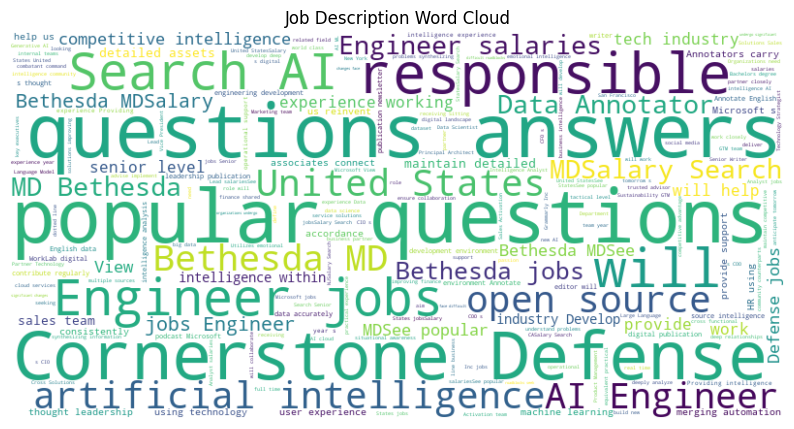

In [8]:
from wordcloud import WordCloud

# Combine all job descriptions into one large text
text = ' '.join(df['Job-Description'].dropna())

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Description Word Cloud')
plt.show()

In [9]:
company_job_title_counts = df.groupby(['Company', 'Job Title']).size()
print(company_job_title_counts.to_string())

Company                                                Job Title                                                                                                              
(add)ventures                                          Creative Director                                                                                                            3
1st Edge, LLC                                          2024-01-O Artificial Intelligence Engineer                                                                                   1
A-5 Cattle Company                                     Ranch Staff                                                                                                                  1
ABCR LLC                                               Product Owner - AI ML                                                                                                        1
ACCEL BI CORPORATION                                   AI Consultant                             

In [10]:
df

,Job Title,Company,Location,Salary($),Job-Type,Job-Description,Raw_Link
0,AI Content Writer,DataAnnotation,Remote,$20 - $25 an hour,Contract,You will have conversations with chatbots in o...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
1,AI Focused Biochemistry Postdoctoral Fellow,Lawrence Berkeley National Laboratory,"San Francisco Bay Area, CA","$77,172 - $103,704 a year",Not Provided,Berkeley Lab’s Applied Mathematics and Computa...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
2,MRI Technologist,Lenox Hill Radiology,"Freeport, NY 11520",$40 - $60 an hour,Part-time,Perform high quality MRI exams on incoming pat...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
3,AI Content Writer (Tier 1),Outlier Ai,California,Not Provided,Not Provided,Flexible work schedule: Work whenever and wher...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
4,Google Cloud Platform Data Engineer,Publicis Sapient,"Houston, TX","$115,000 - $150,000 a year",Full-time,This position requires in-depth knowledge and ...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...
...,...,...,...,...,...,...,...
14997,Competitive Intelligence Lead,"Grammarly, Inc.",Hybrid work in United States,Not Provided,Not Provided,Has experience working at a senior level in co...,https://www.indeed.com/rc/clk?jk=416f3bf573d88...
14998,"Senior Writer and Editor, AI at Work",Microsoft,United States,"$103,800 - $219,200 a year",Full-time,The writer and editor will also contribute reg...,https://www.indeed.com/rc/clk?jk=a753f4b4e9424...
14999,AI Data Annotator,Vistatec,United States,Not Provided,Not Provided,Data Annotators carry out their work in an eng...,https://www.indeed.com/rc/clk?jk=644269f566114...
15000,Sustainability Go-to-Market Activation Lead,Microsoft,United States,"$129,200 - $268,900 a year",Full-time,Sitting in the Cross Solutions Sales Activatio...,https://www.indeed.com/rc/clk?jk=da0e0b51bf349...


In [15]:
duplicates1 = df.duplicated(subset=['Job Title', 'Company', 'Location'], keep=False)

# Count the number of duplicate rows
num_duplicates = duplicates1.sum()
print(f"Number of duplicate rows based on Job Title, Company, and Location: {num_duplicates}")


Number of duplicate rows based on Job Title, Company, and Location: 14521


In [12]:
duplicates = df.duplicated(subset=['Raw_Link'], keep=False)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows based on LINK: {num_duplicates}")


Number of duplicate rows based on LINK: 0


In [16]:
# Print the first two duplicate rows
print(duplicates1.head(2))

0    False
1    False
dtype: bool
